Analise sobre inteligencia canina 
Base de dados : https://www.kaggle.com/datasets/jasleensondhi/dog-intelligence-comparison-based-on-size?resource=download

**1- Importando os dados**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [ ]:
base = pd.read_csv('/content/Dog Intelligence.csv', encoding='cp1252')
base.head()

,Breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,reps_lower,reps_upper
0,Akita,26.0,28.0,80,120,1.0,4.0
1,A0tolian Sheepdog,27.0,29.0,100,150,1.0,4.0
2,Bernese Mountain Dog,23.0,27.0,85,110,1.0,4.0
3,Bloodhound,24.0,26.0,80,120,1.0,4.0
4,Borzoi,26.0,28.0,70,100,1.0,4.0


**2- Conhecendo os dados**

In [ ]:
base.shape

(150, 7)

In [ ]:
base.isna

<bound method DataFrame.isna of                     Breed  height_low_inches  height_high_inches  \
0                   Akita               26.0                28.0   
1       A0tolian Sheepdog               27.0                29.0   
2    Bernese Mountain Dog               23.0                27.0   
3              Bloodhound               24.0                26.0   
4                  Borzoi               26.0                28.0   
..                    ...                ...                 ...   
145              Papillon                8.0                11.0   
146            Pomeranian               12.0                12.0   
147            Poodle Toy               10.0                10.0   
148       Toy Fox Terrier               10.0                10.0   
149     Yorkshire Terrier                8.0                 8.0   

     weight_low_lbs  weight_high_lbs  reps_lower  reps_upper  height  
0                80              120         1.0         4.0    27.0  
1        

**3- Tratando os dados**

Removemos todos os Na e substituimos pela moda

In [ ]:
base['reps_lower'].mode()
base['reps_lower'].fillna(26.0, inplace=True)
base['reps_lower'].isna

<bound method Series.isna of 0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
145    26.0
146    26.0
147    26.0
148    26.0
149    26.0
Name: reps_lower, Length: 150, dtype: float64>

In [ ]:
base['reps_upper'].mode()
base['reps_upper'].fillna(40.0, inplace=True)
base['reps_upper'].isna

<bound method Series.isna of 0       4.0
1       4.0
2       4.0
3       4.0
4       4.0
       ... 
145    40.0
146    40.0
147    40.0
148    40.0
149    40.0
Name: reps_upper, Length: 150, dtype: float64>

**4- Efetuando a análise exploratória**

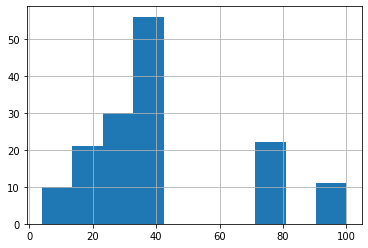

In [ ]:
base['reps_upper'].hist()

Este gráfico apresenta a distribuição do máximo de repetições para o cachorro aprender algo, de fato alguns são mais inteligentes, visto que há um valoume considerável a direita

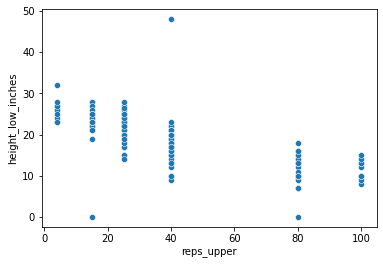

In [ ]:
sns.scatterplot(x = 'reps_upper', y = 'height_low_inches', data=base)

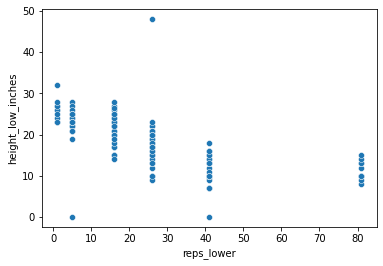

In [ ]:
sns.scatterplot(x = 'reps_lower', y = 'height_low_inches', data=base)

Aparentemente o tamanho do cachorro possui alguma interferência na inteligencia, mas é necessário visualizar estes dados por outros prismas

É necessário conhecer o ponto médio entre altura e peso

In [ ]:
bl['height'] = (base['height_low_inches']+base['height_high_inches'])/2
bl['weight'] = (base['weight_low_lbs']+base['weight_high_lbs'])/2
bl['reps'] = (base['reps_lower']+base['reps_upper'])/2
base.head()

,Breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,reps_lower,reps_upper,height,weight,reps
0,Akita,26.0,28.0,80,120,1.0,4.0,27.0,100.0,2.5
1,A0tolian Sheepdog,27.0,29.0,100,150,1.0,4.0,28.0,125.0,2.5
2,Bernese Mountain Dog,23.0,27.0,85,110,1.0,4.0,25.0,97.5,2.5
3,Bloodhound,24.0,26.0,80,120,1.0,4.0,25.0,100.0,2.5
4,Borzoi,26.0,28.0,70,100,1.0,4.0,27.0,85.0,2.5


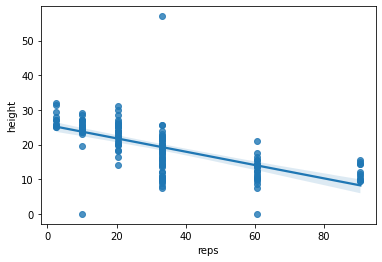

In [ ]:
sns.regplot(x = 'reps', y = 'height', data=bl)

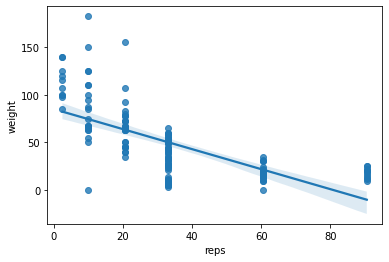

In [ ]:
sns.regplot(x = 'reps', y = 'weight', data=bl)

É possível concluir que existe uma pequena relação, entre a velocidade de aprendizado e o tamanho do cachorro. Visto que a distribuição consegue se aproximar minimamente da linha de regressão 

O que estou tentando entender é :
Os cachorres maiores são de fato mais inteligentes ? 

Abaixo crio uma pontuação ficticia entre a relação de altura e peso. Desta forma posso separar os dados

In [ ]:
bl['hw'] = (bl['height'] + bl['weight'])/2
bl['hw'].head()

0    63.50
1    76.50
2    61.25
3    62.50
4    56.00
Name: hw, dtype: float64

Divido o tamanho dos cachorros em dois grupos, os que estão respectivamente, acima e abaixo da média.

In [ ]:
x = bl.loc[bl['hw'] > 34.44]
y = bl.loc[bl['hw'] < 34.44]
x['hw']

0     63.50
1     76.50
2     61.25
3     62.50
4     56.00
      ...  
89    39.00
90    39.50
91    35.75
96    40.25
98    37.25
Name: hw, Length: 74, dtype: float64

Verifico a distriuição dos dois grupos

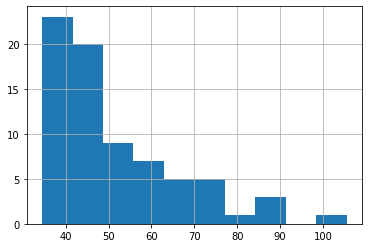

In [ ]:
x['hw'].hist()

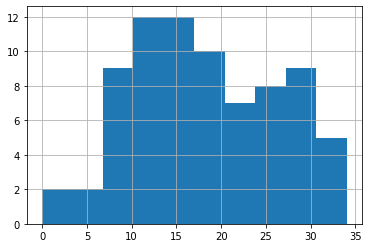

In [ ]:
y['hw'].hist()

Com estes dados posso fazer o teste de hipotese, partindo da premisa popular que cachorros maiores são mais inteligentes, está é a hipótese nula

In [ ]:
from scipy.stats import mannwhitneyu
res = mannwhitneyu(x['hw'], y['hw'], alternative='greater', method='exact')
print(res)

MannwhitneyuResult(statistic=5624.0, pvalue=1.0916473531708763e-44)


In [ ]:
res = mannwhitneyu(x['hw'], y['hw'], alternative='greater', method='asymptotic')
print(res)

MannwhitneyuResult(statistic=5624.0, pvalue=2.0705844801879025e-26)


Efetuando o teste, podemos concluir que não há evidências estatisticas para a hipótese alternativa, ou seja, os cachorros menores provavelmente possuem menos inteligência